## Understanding ANK probes responses

### Conduino measurements
Only ANK probes were connected.

#### Homogeneous water column 

$\rho=1.007536$ at 20.001 $^{\circ}$C at 3:30 pm

Slushing water consisted in manually rorating the table 1 turn in 15 sec and then stopping it completely so water kept going. This was done at minutes 1, 2:30, 4, 5:30 and 7 of the $\sim$7 minute conduino timeseries.

|Code|Description|file|time (pm)|
|:-:|:-------:|:--:|:--:|
|01|Long timeseries, still water|01_ANKs.mat|2:00|
|02|Long timeseries, still water|02_ANKs.mat||
|03|Long timeseries, slushing tank|03_ANKs_slush.mat||
|04|Long timeseries, slushing tank|04_ANKs_slush2.mat||
|05|Long timeseries, water moving a bit after 04|05_ANKs3.mat||
|06|Long timeseries, slushing tank as 04, from rest|06_ANKs_slush3.mat|3:00|
|07|Long timeseries, like 01, from rest|07_ANKs4.mat|3:30|
|08|Long timeseries, slushing tank as 04, from rest|08_ANKs_slush4.mat|3:40|
|09|Long timeseries, like 01, from rest (taken after profiles)|09_ANKs5.mat|5:18|
|10|Long timeseries, slushing tank as 04, from rest, slush at 05:06 instead of 05:30|10_ANKs_slush5.mat|5:28|

#### Stratified water column

800 g salt to bucket 1, but added 2 liters of water to each bucket to see it that is enought to avoid tilting B2 during last bit of filling.

$\rho_1=1.02702$ at 20.000 C

$\rho_2=0.998576$ at 20.008 C

#### Experiments w/ homogeneous water column
from July 18, 2019

$\rho$=1.00934 at 20.016 C

$f_0=0.5$ rad/s, $\Delta f_1$=0.04 rad/s, $\Delta t_1$=21 s, Delta $f_2=$0.04 rad/s, $\Delta t_2=$50 s.


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.io as sio
import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import conduino_tools as ctools
import profiler_tools as ptools

In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|

## Homogeneous watercolumn
### All measurements

Text(0.5,0,'time / s')

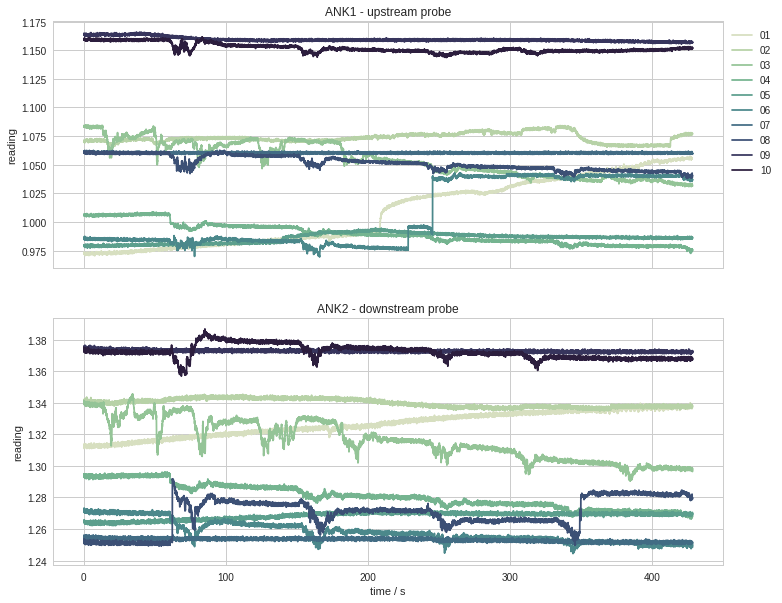

In [4]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(12,10), sharex=True)
labels = ['01','02','03','04','05','06','07','08','09','10'] 
   
filepaths = ['../probe_characterization_17jul19/01_ANKs.mat',
             '../probe_characterization_17jul19/02_ANKs.mat',
             '../probe_characterization_17jul19/03_ANKs_slush.mat',
             '../probe_characterization_17jul19/04_ANKs_slush2.mat',
             '../probe_characterization_17jul19/05_ANKs3.mat',
             '../probe_characterization_17jul19/06_ANKs_slush3.mat',
             '../probe_characterization_17jul19/07_ANKs4.mat',
             '../probe_characterization_17jul19/08_ANKs_slush4.mat',
             '../probe_characterization_17jul19/09_ANKs5.mat',
             '../probe_characterization_17jul19/10_ANKs_slush5.mat',
            ]

sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    
ax0.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax1.set_xlabel('time / s')

### Base readings

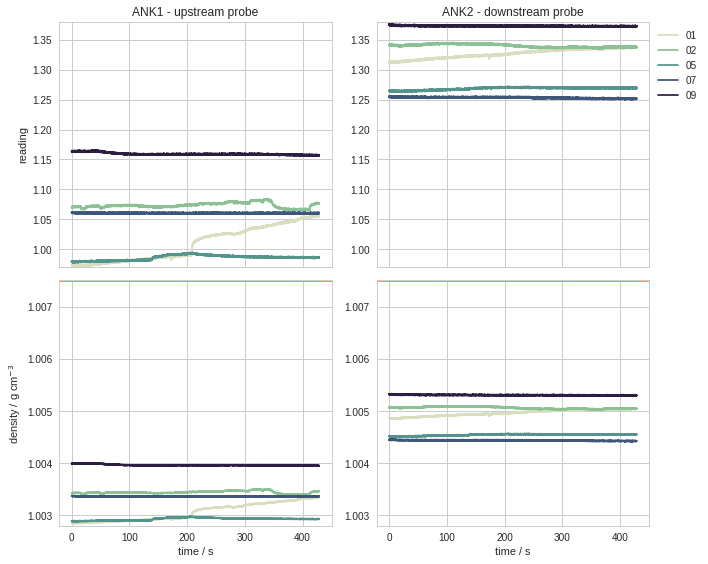

In [6]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(10,8), sharex=True)

ax2.axhline(1.0075, color='coral')
ax3.axhline(1.0075, color='coral')

labels = ['01','02','05','07','09'] 
   
filepaths = ['../probe_characterization_17jul19/01_ANKs.mat',
             '../probe_characterization_17jul19/02_ANKs.mat',
             '../probe_characterization_17jul19/05_ANKs3.mat',
             '../probe_characterization_17jul19/07_ANKs4.mat',
             '../probe_characterization_17jul19/09_ANKs5.mat',
            ]

sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    D1 = ctools.densANK1_12Jul19(P1)
    D2 = ctools.densANK2_12Jul19(P2)
    
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,D1, label=lab)
    ax3.plot(time,D2, label=lab)
    
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax2.set_ylabel('density / g cm$^{-3}$')

ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_xlabel('time / s')
ax3.set_xlabel('time / s')
ax0.set_ylim(0.97,1.38)
ax1.set_ylim(0.97,1.38)
ax2.set_ylim(1.0028,1.00751)
ax3.set_ylim(1.0028,1.00751)


plt.tight_layout()

### Slushing water

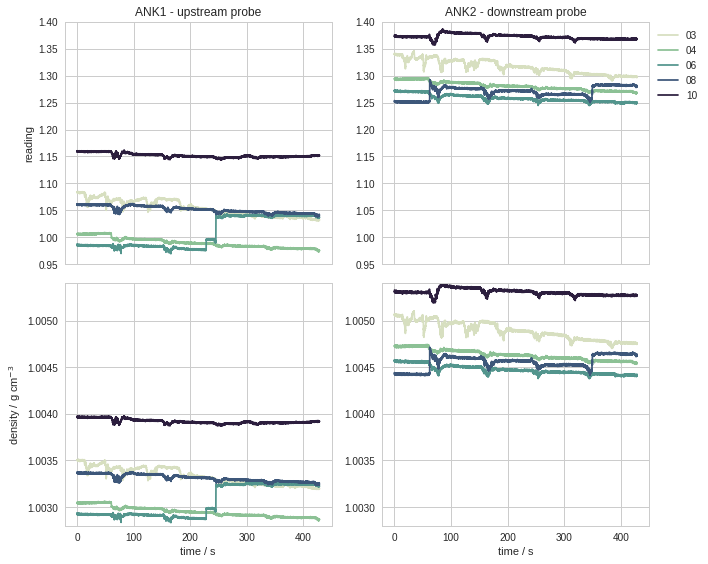

In [8]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(10,8), sharex=True)

labels = ['03','04','06','08','10'] 
   
filepaths = ['../probe_characterization_17jul19/03_ANKs_slush.mat',
             '../probe_characterization_17jul19/04_ANKs_slush2.mat',
             '../probe_characterization_17jul19/06_ANKs_slush3.mat',
             '../probe_characterization_17jul19/08_ANKs_slush4.mat',
             '../probe_characterization_17jul19/10_ANKs_slush5.mat',
            ]

sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    D1 = ctools.densANK1_12Jul19(P1)
    D2 = ctools.densANK2_12Jul19(P2)
    
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,D1, label=lab)
    ax3.plot(time,D2, label=lab)
    
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax2.set_ylabel('density / g cm$^{-3}$')

ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_xlabel('time / s')
ax3.set_xlabel('time / s')
ax0.set_ylim(0.95,1.4)
ax1.set_ylim(0.95,1.4)
ax2.set_ylim(1.0028,1.0054)
ax3.set_ylim(1.0028,1.0054)


plt.tight_layout()

## Stratified watercolumn
### All measurements

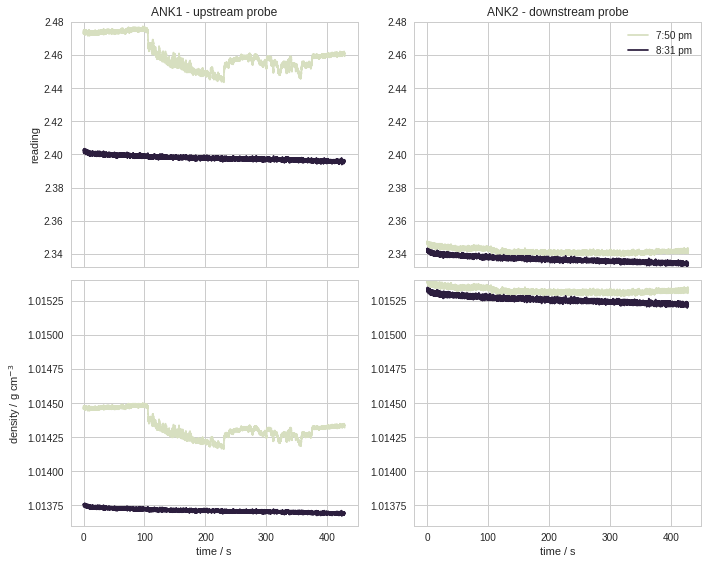

In [10]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(10,8), sharex=True)

labels = ['7:50 pm','8:31 pm'] 
   
filepaths = ['../probe_characterization_17jul19/01_ANKsN.mat',
             '../probe_characterization_17jul19/02_ANKsN.mat',
            ]

sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    D1 = ctools.densANK1_12Jul19(P1)
    D2 = ctools.densANK2_12Jul19(P2)
    
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,D1, label=lab)
    ax3.plot(time,D2, label=lab)
    
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax2.set_ylabel('density / g cm$^{-3}$')

ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_xlabel('time / s')
ax3.set_xlabel('time / s')
ax0.set_ylim(2.332,2.48)
ax1.set_ylim(2.332,2.48)
ax2.set_ylim(1.0136,1.0154)
ax3.set_ylim(1.0136,1.0154)

plt.tight_layout()

### Experiments with homogeneous water column

0.007800000000000029
0.005300000000000082
0.025499999999999856
0.0121
0.016799999999999926
0.011499999999999844
0.03190000000000004
0.01079999999999992
0.04070000000000018
0.012199999999999989


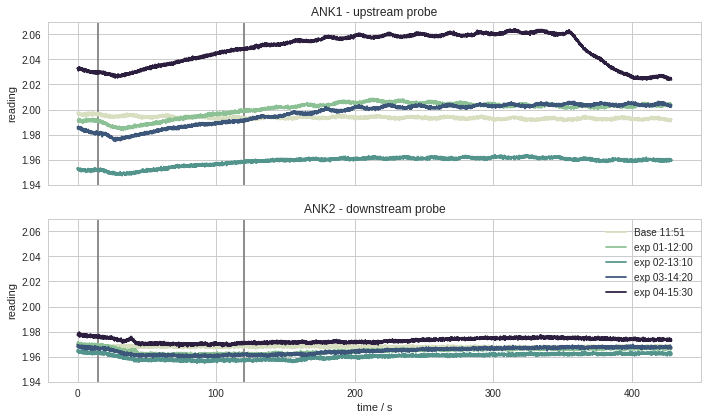

In [15]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,6), sharex=True)
ax0.axvline(15, color='0.5')
ax1.axvline(15, color='0.5')
ax0.axvline(120, color='0.5')
ax1.axvline(120, color='0.5')

labels = ['Base 11:51','exp 01-12:00','exp 02-13:10','exp 03-14:20','exp 04-15:30'] 
   
filepaths = ['../probe_characterization_18jul19/01_base.mat',
             '../probe_characterization_18jul19/02_experiment1.mat',
             '../probe_characterization_18jul19/03_experiment2.mat',
             '../probe_characterization_18jul19/04_experiment3.mat',
             '../probe_characterization_18jul19/05_experiment4.mat',
            ]

sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    print(np.max(P1)-np.min(P1))
    print(np.max(P2)-np.min(P2))
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('reading')

ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax1.set_xlabel('time / s')
ax0.set_ylim(1.94,2.07)
ax1.set_ylim(1.94,2.07)
plt.tight_layout()

6.599603013790478e-05
5.7935978998946425e-05
0.0002158974981631978
0.00013206995397951893
0.00014010976644418527
0.0001251279970635455
0.0002695314738603294
0.00011778467264034198
0.00035076956823454353
0.00013379275440539296


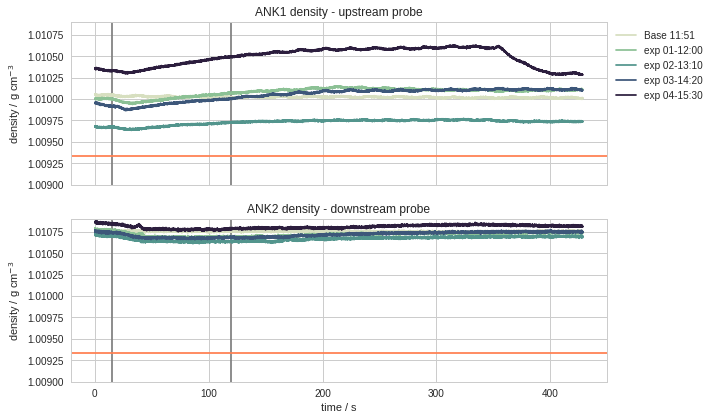

In [20]:
fig, (ax2,ax3) = plt.subplots(2,1, figsize=(10,6), sharex=True)

ax2.axvline(15, color='0.5')
ax3.axvline(15, color='0.5')
ax2.axvline(120, color='0.5')
ax3.axvline(120, color='0.5')
ax2.axhline(1.00934, color='coral')
ax3.axhline(1.00934, color='coral')

labels = ['Base 11:51','exp 01-12:00','exp 02-13:10','exp 03-14:20','exp 04-15:30'] 
   
filepaths = ['../probe_characterization_18jul19/01_base.mat',
             '../probe_characterization_18jul19/02_experiment1.mat',
             '../probe_characterization_18jul19/03_experiment2.mat',
             '../probe_characterization_18jul19/04_experiment3.mat',
             '../probe_characterization_18jul19/05_experiment4.mat',
            ]

sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    D1 = ctools.densANK1_12Jul19(P1)
    D2 = ctools.densANK2_12Jul19(P2)
    
    time = mat['time']
    ax2.plot(time,D1, label=lab)
    ax3.plot(time,D2, label=lab)
    print(np.max(D1)-np.min(D1))
    print(np.max(D2)-np.min(D2))
ax2.legend(bbox_to_anchor=(1,1))

ax2.set_ylabel('density / g cm$^{-3}$')
ax3.set_ylabel('density / g cm$^{-3}$')

ax2.set_title('ANK1 density - upstream probe')
ax3.set_title('ANK2 density - downstream probe')
ax3.set_xlabel('time / s')
ax2.set_ylim(1.009,1.0109)
ax3.set_ylim(1.009,1.0109)


plt.tight_layout()